In [1]:
import numpy as np
import matplotlib.pyplot as plt

freqs = np.loadtxt('data/freq.txt')
MC_dist_ensem_sed = np.loadtxt("data/MC_dist_ensem_sed.txt")

In [2]:
from SpyDust.mom_exp import MC_moment_expansion

l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Tev table already exists at /Users/zzhang/Workspace/SpyDust/SpyDust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored


/Users/zzhang/Workspace/SpyDust/SpyDust/free_free.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(gff_data_file, delim_whitespace=True, comment=';', header=None, names=['gamma2', 'u', 'gff'])
/Users/zzhang/Workspace/SpyDust/SpyDust/SED_fit.py:408: SyntaxWarning: invalid escape sequence '\l'
  :math:`x_i = \ln \nu_i` and local spacings :math:`\Delta x_i`, we define


Gaunt factor stored


In [3]:
idx = np.where((freqs >= 15) & (freqs <= 80))[0]
freqs_fit = freqs[idx]
examples_to_fit = MC_dist_ensem_sed[:, idx]

pivots = [np.log(5e-8), -0.45, np.log(1e-4)]
MCME = MC_moment_expansion(pivots, default_freqs=freqs_fit)

ind = 10

fit_result = MCME.fit_basis_functions(
    target_sed=examples_to_fit[ind], 
    freqs=freqs_fit, 
    order=2, 
    include_zeroth=True, 
    return_fitted=True, 
    tumbling=True
)

In [4]:
fit_result["coefficients"]

array([ 0.40069835,  0.29334074,  0.20225184, -1.98028734,  0.09538342,
       -0.13067666,  3.57078294, -0.12561565,  0.84677175, -0.52465567])

In [5]:
fit_result["coefficient_labels"]

['zeroth',
 'first:log_a',
 'first:beta',
 'first:log_xC',
 'second_diag:log_a',
 'second_diag:beta',
 'second_diag:log_xC',
 'second_cross:log_a:beta',
 'second_cross:log_a:log_xC',
 'second_cross:beta:log_xC']

/var/folders/r5/jq1d5z7917582lhx9y8r4rj80000gn/T/ipykernel_73034/3897062212.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_resid.legend(loc="lower left", frameon=False)


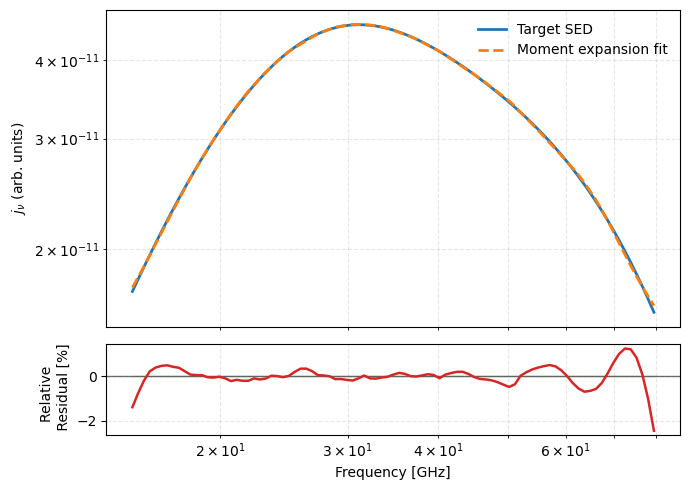

In [ ]:
fig, axes = plt.subplots(
    2,
    1,
    figsize=(7, 5),
    sharex=True,
    gridspec_kw={"height_ratios": [3.5, 1.0]}
 )
fig.subplots_adjust(hspace=0.06)
ax_sed, ax_resid = axes

freqs_plot = fit_result["freqs"]
target_sed = examples_to_fit[ind]
fitted_sed = fit_result["fitted_sed"]
residual = fit_result["residual"]
relative_residual = 100.0 * residual / np.maximum(target_sed, 1e-30)  # percent

# Top panel: target vs. fitted SED
ax_sed.plot(freqs_plot, target_sed, label="Target SED", color="#1f77b4", linewidth=2.0)
ax_sed.plot(
    freqs_plot,
    fitted_sed,
    label="Moment expansion fit",
    color="#ff7f0e",
    linestyle="--",
    linewidth=2.0
)
ax_sed.set_ylabel(r'$j_\nu$ (arb. units)')
ax_sed.set_xscale("log")
ax_sed.set_yscale("log")
# ax_sed.set_title("Moment Expansion Approximation", fontsize=14, pad=8)
ax_sed.legend(loc="upper right", frameon=False)
ax_sed.grid(True, which="both", linestyle="--", alpha=0.3)

# Bottom panel: residual diagnostics
ax_resid.axhline(0.0, color="0.2", linewidth=1.0, alpha=0.7)
ax_resid.fill_between(
    freqs_plot,
    residual,
    0.0,
    color="#2ca02c",
    alpha=0.2
)
# ax_resid.plot(
#     freqs_plot,
#     residual,
#     color="#2ca02c",
#     linewidth=1.6,
#     label="Absolute residual"
#  )
ax_resid.plot(
    freqs_plot,
    relative_residual,
    color="#d62728",
    # linestyle=":",
    linewidth=1.8,
    # label="Relative residual (%)"
 )
ax_resid.set_xlabel("Frequency [GHz]")
ax_resid.set_ylabel("Relative  \n Residual [%]")
ax_resid.set_xscale("log")
ax_resid.tick_params(axis="x", which="both", pad=3)
ax_resid.grid(True, which="both", linestyle="--", alpha=0.3)
ax_resid.legend(loc="lower left", frameon=False)

plt.tight_layout()
plt.savefig("figures/mom_exp.pdf")
plt.show()